# Topics
## 1. A Deeper Understanding of Objects in Python
## 2. Relaxation Method


## Everything in Python is an Object...for example:

#### b = int(3) more than assignment: it's an instantiation of 3 into class int()

In [ ]:
''' 
a = 2 in python has a very different meaning
from int a = 2 in c.
'''
a = 2
b = int(3)
print a, b
# __...__ : double underscore, or "dunder"
#print dir(a)

In [ ]:
print a.__abs__(), b.__abs__()

In [ ]:
# The default value at instantiation is 0
c = int()
print c

In [ ]:
# Is it legal? If so, what does this mean? If not, why not? 
gint = int

In [ ]:
d = gint(4)
print d, type(d)

In [ ]:
class hint(int):
    pass

e = hint(5)
print e, type(e)
print isinstance(e, hint), isinstance(e, int)

In [ ]:
# Is this ok?
print (-5).__abs__()

## Relaxation Methods: The Jacobi Method
### Solving a linear set of equations

#### 

In [105]:
import numpy as np

max_iter = 100

# initialize the matrix
A = np.array([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0.0, 3., -1., 8.]])

D = np.diag(A)
print "The diagonal elements:\n", D
print "The diagonal matrix:\n", np.diagflat(D)
R = A - np.diagflat(D)
print "The remainder matrix:\n", R

# initialize the RHS vector
b = np.array([6., 25., -11., 15.])


# prints the linear system
print("System of Linear Equations:")
for i in range(A.shape[0]):
    row = ["{}*x{}".format(A[i, j], j + 1) for j in range(A.shape[1])]
    print " + ".join(row) + "=" + str(b[i])
print '\n\n'

# Initial Guess: Usually you would want an "educated" guess, 
# typcially x_guess = D^(-1)b. 
# But because the method is so robust, it hardly matters...
# We will try all 0's and a set of random numbers.
x = np.zeros(b.shape)
#x = np.random.rand(b.shape[0])
# specify tolerance
tol = 1e-4

counter = 0
print 'Starting Jacobi method iterations...'
while counter < max_iter:
    print "Iteration {:d}:{}".format(counter, x)
    # Just to create a numpy array that has the same dimension as x.
    x_new = np.empty(x.shape)

    for i in range(A.shape[0]):
        # np.dot computes dot product
        
        s = np.dot(R[i,], x)
        x_new[i] = (b[i] - s) / A[i, i]
            
    counter += 1      
    # Returns True if two arrays are element-wise equal within a tolerance.
    if np.allclose(x, x_new, rtol=tol):
        print 'Tolerance achieved.  Printing results...'
        break      
    else:
        if counter == max_iter:
            raise Exception('max_iter exceeded!')

    x = x_new

print '\n\n'
print "Solution:", x 
print "Estimated Error:", (np.dot(A, x) - b)/b 

The diagonal elements:
[ 10.  11.  10.   8.]
The diagonal matrix:
[[ 10.   0.   0.   0.]
 [  0.  11.   0.   0.]
 [  0.   0.  10.   0.]
 [  0.   0.   0.   8.]]
The remainder matrix:
[[ 0. -1.  2.  0.]
 [-1.  0. -1.  3.]
 [ 2. -1.  0. -1.]
 [ 0.  3. -1.  0.]]
System of Linear Equations:
10.0*x1 + -1.0*x2 + 2.0*x3 + 0.0*x4=6.0
-1.0*x1 + 11.0*x2 + -1.0*x3 + 3.0*x4=25.0
2.0*x1 + -1.0*x2 + 10.0*x3 + -1.0*x4=-11.0
0.0*x1 + 3.0*x2 + -1.0*x3 + 8.0*x4=15.0



Starting Jacobi method iterations...
Iteration 0:[ 0.  0.  0.  0.]
Iteration 1:[ 0.6         2.27272727 -1.1         1.875     ]
Iteration 2:[ 1.04727273  1.71590909 -0.80522727  0.88522727]
Iteration 3:[ 0.93263636  2.05330579 -1.04934091  1.13088068]
Iteration 4:[ 1.01519876  1.95369576 -0.96810863  0.97384272]
Iteration 5:[ 0.9889913   2.01141473 -1.0102859   1.02135051]
Iteration 6:[ 1.00319865  1.99224126 -0.99452174  0.99443374]
Iteration 7:[ 0.99812847  2.00230688 -1.00197223  1.00359431]
Iteration 8:[ 1.00062513  1.9986703  -0.99903

#### z.shape() gives you size of object, i.e. z.shape((5,2)) gives 5 by 2 matrix.
#### np.empty() gives you list of random numbers of desired size.

In [104]:
import numpy as np

z = np.empty((5,2))    ## Row x Column
print z.shape[0]
print z
w = np.zeros(z.shape)
print w

5
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


## Relaxation Methods: The Laplace Equation


More at http://en.wikipedia.org/wiki/Relaxation_(iterative_method)

## The Physics:
### This corresponds to the electric potential of a parallel plate capacitor 
### (length, width >> thickness)

[ 0.          0.09998692  0.19997634  0.29996902  0.39996537  0.49996537
  0.59996867  0.69997466  0.79998249  0.89999124  1.        ]


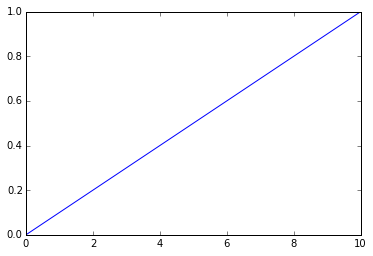

In [107]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt

NX = 11

#initialization
V = np.zeros(NX)

#Boundary Conditions:
V[NX-1] = 1.
V[0] = 0
maxdiff = 1e-6
diff = 1
x = np.arange(NX)

while diff > maxdiff:
    for i in range(1, NX-1):    # start from 1 and end at NX-1: because you don't want to change the BC!!!!  
        newV = (V[i-1]+V[i+1])/2
        diff = abs(newV - V[i])
        V[i] = newV
        prev_diff = abs(newV - V[i])
        if diff < prev_diff:
            diff = prev_diff
   
            
print V
plt.plot(x, V)
plt.show()
          

[ 0.85735718  0.62817881  0.75381399  0.40289112  0.39108324  0.34410828
  0.06548881  0.64726373  0.88260371  0.98183031  0.40285877]
[ 0.          0.09998626  0.19997515  0.29996747  0.39996363  0.49996363
  0.59996711  0.69997339  0.79998161  0.89999081  1.        ]


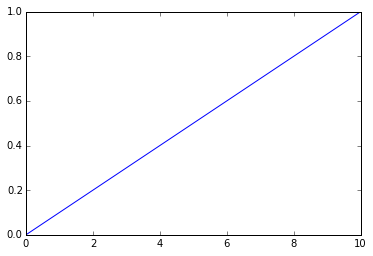

In [110]:
%matplotlib inline
# I can use random numbers to initialize the interior points.

import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

NX = 11

#initialization
V = rand(NX)    #yes I can initialize with random numbers!


#V = rand(NX)*1e12    # or even crazily large random numbers!

print V

#Boundary Conditions:
V[NX-1] = 1.
V[0] = 0
maxdiff = 1e-6
diff = 1
x = np.arange(NX)

while diff > maxdiff:
    for i in range(1, NX-1):    # start from 1 and end at NX-1: because you don't want to change the BC!!!!  
        newV = (V[i-1]+V[i+1])/2
        diff = abs(newV - V[i])
        V[i] = newV
 
  
            
print V
plt.plot(x, V)
plt.show()

# A very robust method!
        

## Breakout Problem:
### For a long rectangular tube (say 10 by 10), the potential on two opposite sides = 1 volt, and the potential on the other two sides = 0.  
### Write a program to find V(x, y) in the interior of the tube. 
### Then plot the result as a surface plot.

In [13]:
%matplotlib osx
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

NX = 15
NY = 15

#initialization
V = np.empty((NX,NY))

#Boundary Conditions:
V[0,:] = 0
V[NX-1, :] = 0
V[:, 0] = 1
V[:, NY-1] = 1
print V
    

maxdiff = 1e-6
diff = 1
x = np.arange(NX)
y = np.arange(NY)

while diff > maxdiff:
    for i in range(1, NX-1):    # start from 1 and end at NX-1: because you don't want to change the BC!!!!  
        for j in range(1, NY-1):
            newV = (V[i, j-1] + V[i, j+1] + V[i-1, j] + V[i+1, j])/4
            diff = abs(newV - V[i, j])
            V[i, j] = newV
   
            
print V
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(x, y, V, rstride = 1, cstride = 1, cmap=cm.coolwarm, linewidth = 0)
plt.show()

[[  1.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   1.00000000e+000]
 [  1.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   1.00000000e+000]
 [  1.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   1.00000000e+000]
 [  1.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    0.00000000e

## We will see the connection between PDE and linear algebra next week.

## End of week 7-2